##**PROYECTO DE INTELIGENCIA ARTIFICIAL**
**Univ.:** Wilder Choque Cruz      
**DOCENTE:**  M.Sc. Moises Silva           
**MATERIA: INF- 354**


**Tópico:**Cualquier temática del área médica afrontada por IA

In [ ]:
# Accediendo a Google Drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Copiamos los archivos de Drive al entorno de Colab
!cp "/content/drive/MyDrive/Datasets/chest_xray.zip" "chest_xray.zip"
!unzip -uq "chest_xray.zip"

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Bibliotecas a emplear
import os
import cv2
import keras
import numpy as np
from keras.preprocessing.image import ImageDataGenerator
from keras import models
from keras import layers
import matplotlib.pyplot as plt

In [ ]:
# Definir las rutas donde estan las imagenes
train_folder= '/content/chest_xray/train'
val_folder = '/content/chest_xray/val'
test_folder = '/content/chest_xray/test'

In [ ]:
# Se toman 4 imagenes de forma aleatoria
os.listdir(train_folder)
train_sanas = train_folder+'/NORMAL/'
train_neum = train_folder+'/PNEUMONIA/'
img_sanas = []
img_neumonia = []
for i in range(4):#Lista de rutas aleatorias
    num_alea = np.random.randint(len(os.listdir(train_sanas)))
    img_sanas.append(train_sanas + os.listdir(train_sanas)[num_alea])
    img_neumonia.append(train_neum + os.listdir(train_neum)[num_alea])
#rutas de las imgenes aleatorias
print(img_sanas)
print(img_neumonia)

['/content/chest_xray/train/NORMAL/IM-0608-0001-0001.jpeg', '/content/chest_xray/train/NORMAL/NORMAL2-IM-0535-0001-0002.jpeg', '/content/chest_xray/train/NORMAL/IM-0616-0001.jpeg', '/content/chest_xray/train/NORMAL/IM-0302-0001.jpeg']
['/content/chest_xray/train/PNEUMONIA/person290_virus_594.jpeg', '/content/chest_xray/train/PNEUMONIA/person1316_bacteria_3326.jpeg', '/content/chest_xray/train/PNEUMONIA/person958_virus_1630.jpeg', '/content/chest_xray/train/PNEUMONIA/person1228_virus_2079.jpeg']


Primer fila: personas sin neumonía
Segunda fila: personas con neumonía


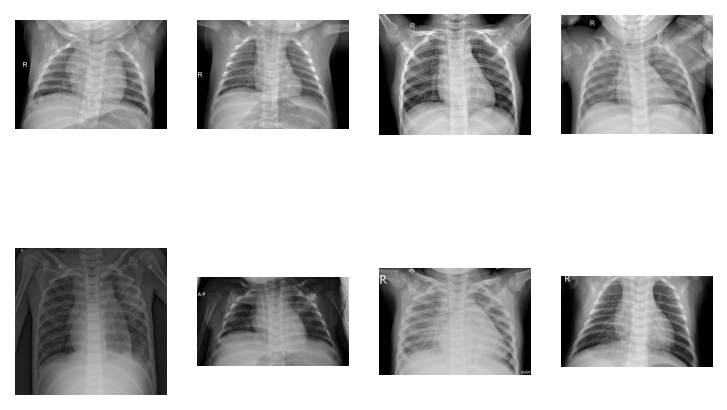

In [ ]:
# Se muestran radiografías de personas con y sin neumonía
print('Primer fila: personas sin neumonía')
print('Segunda fila: personas con neumonía')
plt.rcParams['figure.dpi'] = 150
for num_imagen in range(8):
    if num_imagen<4:
        imagen = cv2.imread(img_sanas[num_imagen])
    else:
        imagen = cv2.imread(img_neumonia[num_imagen-4])
    plt.subplot(2,4,num_imagen+1)
    plt.imshow(imagen)
    plt.axis('off')
plt.show()

In [ ]:
# Red neuronal convolucional
cnn = models.Sequential()

# Capas convolucionales y de pooling
cnn.add(layers.Conv2D(32, (3, 3), activation="relu", input_shape=(150, 150, 3)))
cnn.add(layers.MaxPooling2D(pool_size = (2, 2)))
cnn.add(layers.Conv2D(32, (3, 3), activation="relu"))
cnn.add(layers.MaxPooling2D(pool_size = (2, 2)))
cnn.add(layers.Conv2D(32, (3, 3), activation="relu"))
cnn.add(layers.MaxPooling2D(pool_size = (2, 2)))
cnn.add(layers.Flatten())

# Capas densamente conectadas
cnn.add(layers.Dense(activation = 'relu', units = 128))
cnn.add(layers.Dense(activation = 'sigmoid', units = 1))

# Compilar el modelo neuronal
cnn.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [ ]:
# Detalle de la red neuronal convolucional
cnn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 36, 36, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 32)        9248      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 17, 17, 32)       0

In [ ]:
# Preprocesamiento de las imagenes
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)
# Normalización de imagenes
test_datagen = ImageDataGenerator(rescale = 1./255)

# Generación de los conjuntos de entrenamiento, validación y prrueba
training_set = train_datagen.flow_from_directory(train_folder,
                                                 target_size = (150, 150),
                                                 batch_size = 20,
                                                 class_mode = 'binary')

validation_generator = test_datagen.flow_from_directory(val_folder,
                                                        target_size =(150, 150),
                                                        batch_size = 20,
                                                        class_mode = 'binary')

test_set = test_datagen.flow_from_directory(test_folder,
                                            target_size = (150, 150),
                                            batch_size = 20,
                                            class_mode = 'binary')

Found 3512 images belonging to 2 classes.
Found 1172 images belonging to 2 classes.
Found 1172 images belonging to 2 classes.


In [ ]:
cnn_model = cnn.fit(training_set,
                    steps_per_epoch=100,
                    epochs=10,
                    validation_data=validation_generator,
                    validation_steps=50)

Epoch 1/10
100/100 [==============================] - 49s 372ms/step - loss: 0.4523 - accuracy: 0.8015 - val_loss: 0.2001 - val_accuracy: 0.9420
Epoch 2/10
100/100 [==============================] - 37s 372ms/step - loss: 0.3119 - accuracy: 0.8735 - val_loss: 0.1843 - val_accuracy: 0.9290
Epoch 3/10
100/100 [==============================] - 37s 370ms/step - loss: 0.2522 - accuracy: 0.9046 - val_loss: 0.1685 - val_accuracy: 0.9410
Epoch 4/10
100/100 [==============================] - 39s 388ms/step - loss: 0.2544 - accuracy: 0.9011 - val_loss: 0.1815 - val_accuracy: 0.9250
Epoch 5/10
100/100 [==============================] - 36s 365ms/step - loss: 0.2212 - accuracy: 0.9152 - val_loss: 0.1230 - val_accuracy: 0.9610
Epoch 6/10
100/100 [==============================] - 38s 383ms/step - loss: 0.2072 - accuracy: 0.9210 - val_loss: 0.1006 - val_accuracy: 0.9680
Epoch 7/10
100/100 [==============================] - 37s 369ms/step - loss: 0.1888 - accuracy: 0.9280 - val_loss: 0.1216 - val_ac

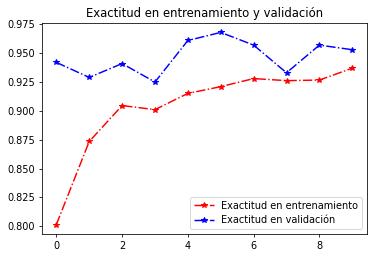

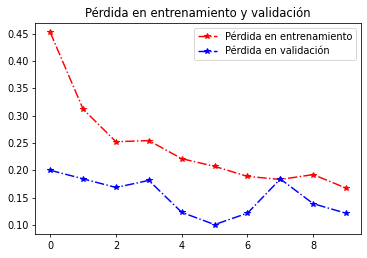

In [ ]:
# Graficas de la presición y función de perdida

acc = cnn_model.history['accuracy']
val_acc = cnn_model.history['val_accuracy']
loss = cnn_model.history['loss']
val_loss = cnn_model.history['val_loss']

epochs = range(len(acc))

plt.rcParams['figure.dpi'] = 70
plt.plot(epochs, acc, '-.r*', label='Exactitud en entrenamiento')
plt.plot(epochs, val_acc, '-.b*', label='Exactitud en validación')
plt.title('Exactitud en entrenamiento y validación')
plt.legend()
plt.figure()

plt.plot(epochs, loss, '-.r*', label='Pérdida en entrenamiento')
plt.plot(epochs, val_loss, '-.b*', label='Pérdida en validación')
plt.title('Pérdida en entrenamiento y validación')
plt.legend()

plt.show()

In [ ]:
test_accu = cnn.evaluate(test_set,steps=50)

50/50 [==============================] - 8s 158ms/step - loss: 0.2914 - accuracy: 0.9040


In [ ]:
print('La exactitud en el conjunto de prueba es: ',test_accu[1]*100, '%')

La exactitud en el conjunto de prueba es:  90.39999842643738 %


Persona sin neumonia


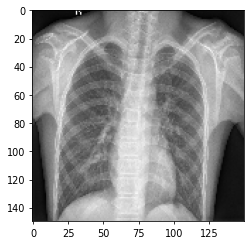

In [ ]:
# Predicción sobre una imagen de prueba

img_ori = cv2.imread('/content/chest_xray/test/NORMAL/IM-0011-0001-0002.jpeg')
#img_ori = cv2.imread('/content/chest_xray/test/PNEUMONIA/person119_bacteria_566.jpeg')

img_ori = cv2.cvtColor(img_ori, cv2.COLOR_BGR2RGB)
img = cv2.resize(img_ori, (150, 150), interpolation=cv2.INTER_CUBIC)
imagen_a_probar = np.reshape(img,(1,150, 150, 3))
predictions = cnn.predict(imagen_a_probar)
if(predictions == 0):
  print('Persona sin neumonia')
else:
  print('Persona con neumonia')
plt.imshow(img)
plt.show()

**COMPRESIÓN DE IMÁGENES MEDIANTE REDUCCIÓN DE DIMENSIONALIDAD CON TÉCNICA DE ANÁLISIS DE COMPONENTES PRINCIPALES (PCA)**

(784, 1088, 3)
Dim1:  784
Dim2:  1088
Dim3:  3


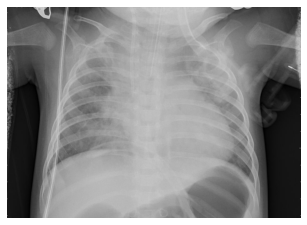

In [ ]:
import matplotlib.image as mpimg 
import matplotlib.pyplot as plt
import numpy as np 
from sklearn.decomposition import PCA
path=r'';
mg_oriA = cv2.imread('/content/chest_xray/test/PNEUMONIA/person119_bacteria_566.jpeg')
#img = mpimg.imread(path+'wild.png') 
img =mg_oriA 

print (img.shape) 
plt.axis('off') 
plt.imshow(img) 

dimension1=img.shape[0]
print('Dim1: ',dimension1)

dimension2=img.shape[1]
print('Dim2: ',dimension2)

dimension3=img.shape[2]
print('Dim3: ',dimension3)

**Preparación: reshape de imagen**

La imagen tiene 784 filas, cada fila tiene 1088x3 pixeles. Transformaremos la imagen en un formato adecuado para que PCA pueda trabajar (2 dimensiones). Los algoritmos clásicos de machine learning trabajan con 2 dimensiones.

Una Red Neuronal Convolucional puede trabajar con más de 2 dimensiones

In [ ]:
#3264=1088*3
totalColumnas= dimension2 * dimension3
print('Cantidad de columnas (variables):',totalColumnas)

Cantidad de columnas (variables): 3264


(784, 3264)


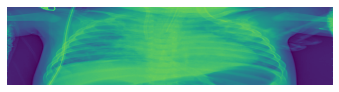

In [ ]:
img_r = np.reshape(img, (dimension1, totalColumnas)) 
print (img_r.shape)
plt.axis('off') 
plt.imshow(img_r) 

# Reducción de dimensionalidad con PCA
Con PCA intentaremos reducir de  3264 variables (columnas) a una cantidad menor de nuevas variables que representen aproximadamente la misma cantidad de información (varianza) de la imagen original. Esta estructura reducida se denomina un modelo puesto que representa el conjunto de datos original.

In [ ]:
ipca = PCA(25).fit(img_r)

img_c = ipca.transform(img_r) 
print (img_c.shape) 
print (ipca.explained_variance_ratio_)
print (np.sum(ipca.explained_variance_ratio_))
np.size(ipca.explained_variance_ratio_)
#ipca.explained_variance_ratio_
#Con 35 componenentes podemos tener el 98% de la información (varianza)

(784, 25)
[0.40769273 0.21926643 0.13716906 0.04605684 0.02689871 0.02263065
 0.01845129 0.01151492 0.01083544 0.00804536 0.0076317  0.00667087
 0.00570081 0.0051343  0.0048713  0.00442081 0.0037176  0.00331236
 0.00302323 0.00268271 0.00253091 0.00235797 0.00228072 0.00187587
 0.0016203 ]
0.9663928961985639


25

**Visualización de imagen reducida**

In [ ]:
#Visualización de como PCA ha realizado su compresión: se obtiene la transformada inversa de la salida de PCA y 
#se transforma posteriormente para su visualización. 
temp = ipca.inverse_transform(img_c) 
print (temp.shape) 

#reshaping 1396 back to the original 349 * 4 
temp = np.reshape(temp, (dimension1,dimension2,dimension3)) 
print (temp.shape)

(784, 3264)
(784, 1088, 3)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


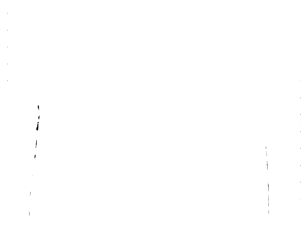

In [ ]:
#Visualizar con imshow la imagen comprimida
plt.axis('off') 
plt.imshow(temp)

**Conclusiones**

Hemos aprendido a aplicar una técnica de reducción de dimensionalidad en un problema de compresión de imágenes.

Hemos obtenido más del 97% de la varianza con 25 componentes y en la imagen hemos podido visualmente reconocer los elementos más importantes. 

Hemos transformado una imagen de 140KB a una de 95KB.

 **Referencias**
 
[1] Bishop, C. M. (2006). Pattern recognition and machine learning. springer.

[2] P. Joshi. (2017). Artificial intelligence with python. Packt Publishing Ltd.

**Enlaces de documentación de scikit-learn:**

https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html


# **Explicar cómo funciona PCA (algebra lineal)**

Introducción
Muchas veces los conjuntos de datos que disponemos contienen un número de variables alto y lo que buscamos es poder explicar la relación entre las variables. 

Podemos realizar una reducción de la dimensionalidad del conjunto de datos consiguiendo un número menor de variables que expliquen la mayor cantidad de información posible de los datos originales, y aquí es donde entra en juego el Análisis de Componentes Principales (PCA, por su traducción al inglés). 

PCA es un método matemático que pertenece a los métodos de aprendizaje no supervisado (no tenemos una variable target con etiquetas) y una de sus funciones es extraer información útil a partir de las variables originales. Esto nos ayuda a simplificar análisis posteriores como la representación de los datos en dos o tres dimensiones. 

La idea matemática detrás es conseguir p variables ortogonales nuevas (componentes principales) y cada una de ellas es una combinación lineal de las m variables originales, de forma que expliquen la mayor cantidad de variabilidad del conjunto de datos original posible. 

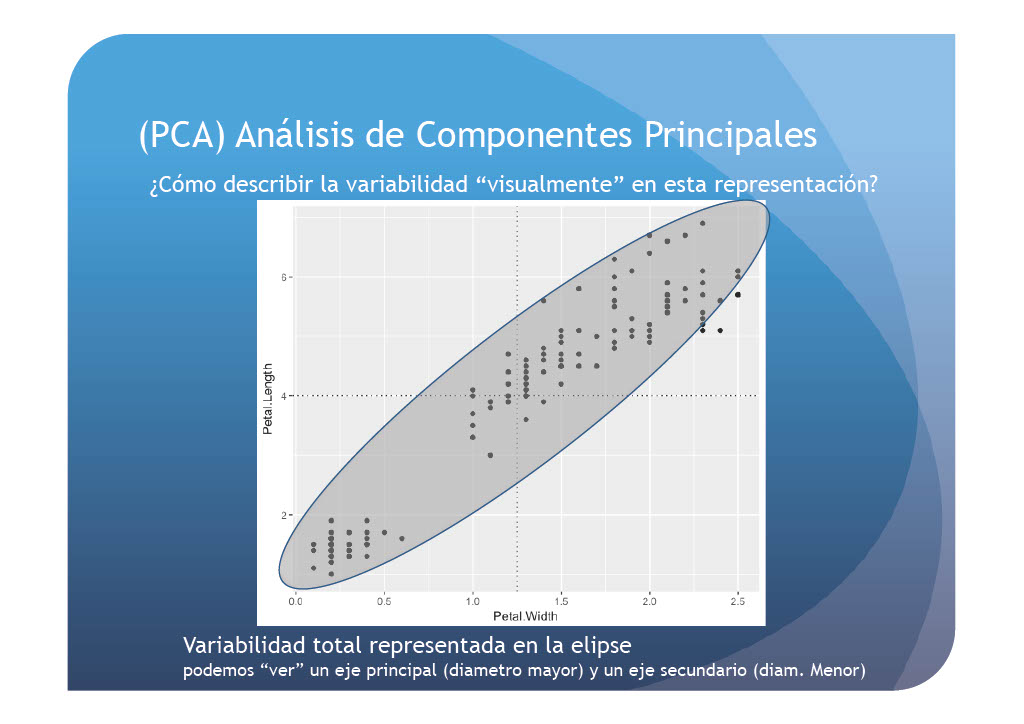

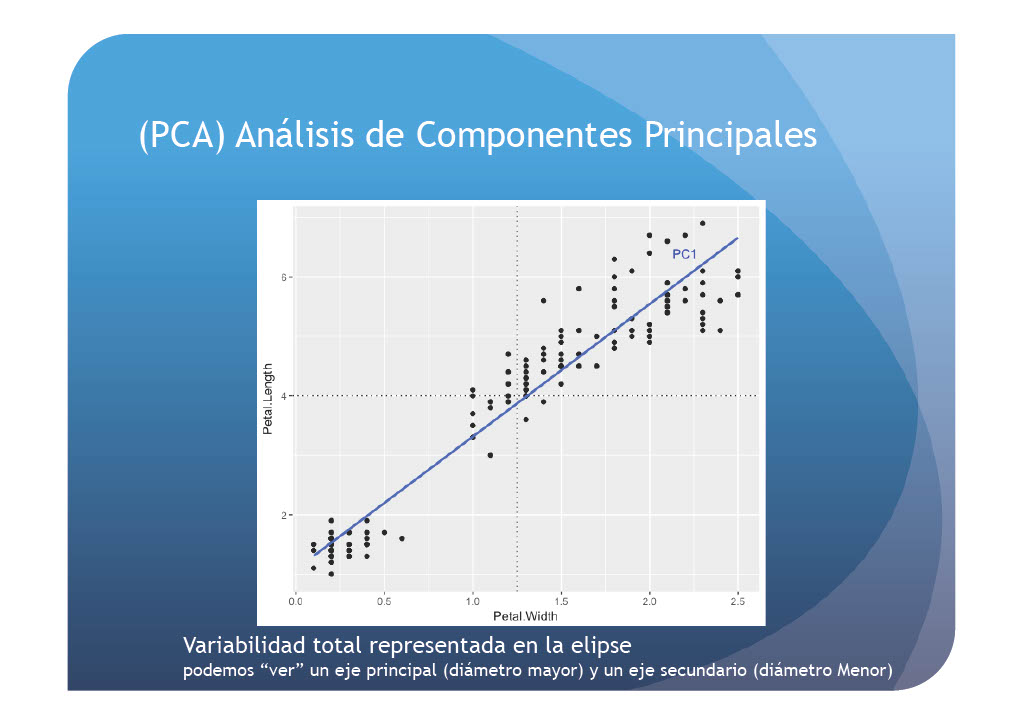

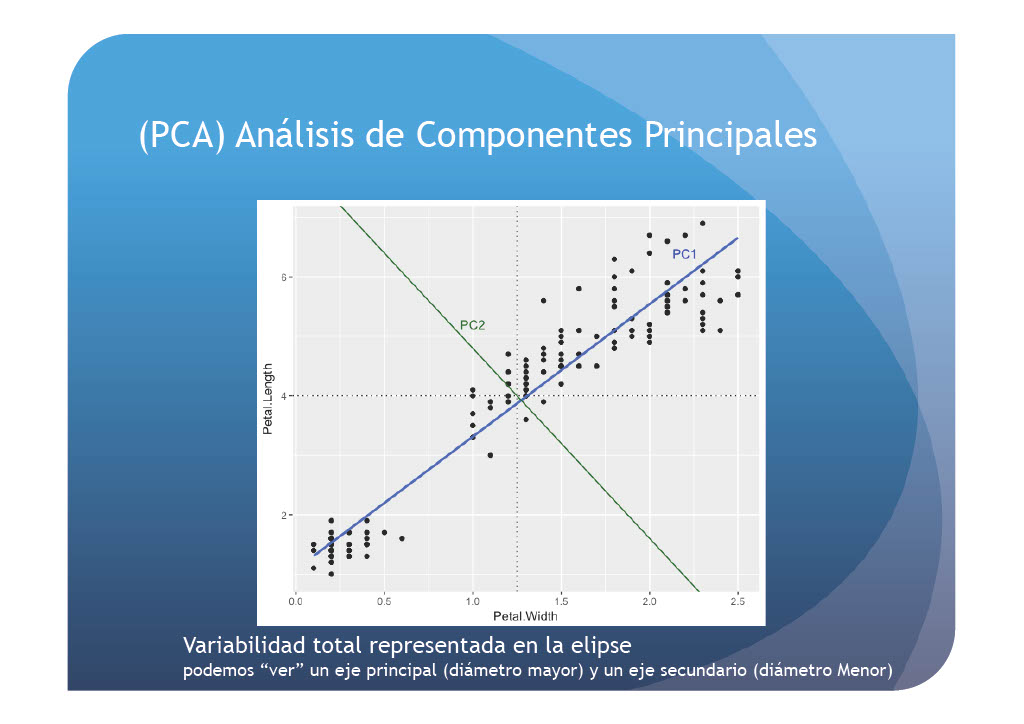

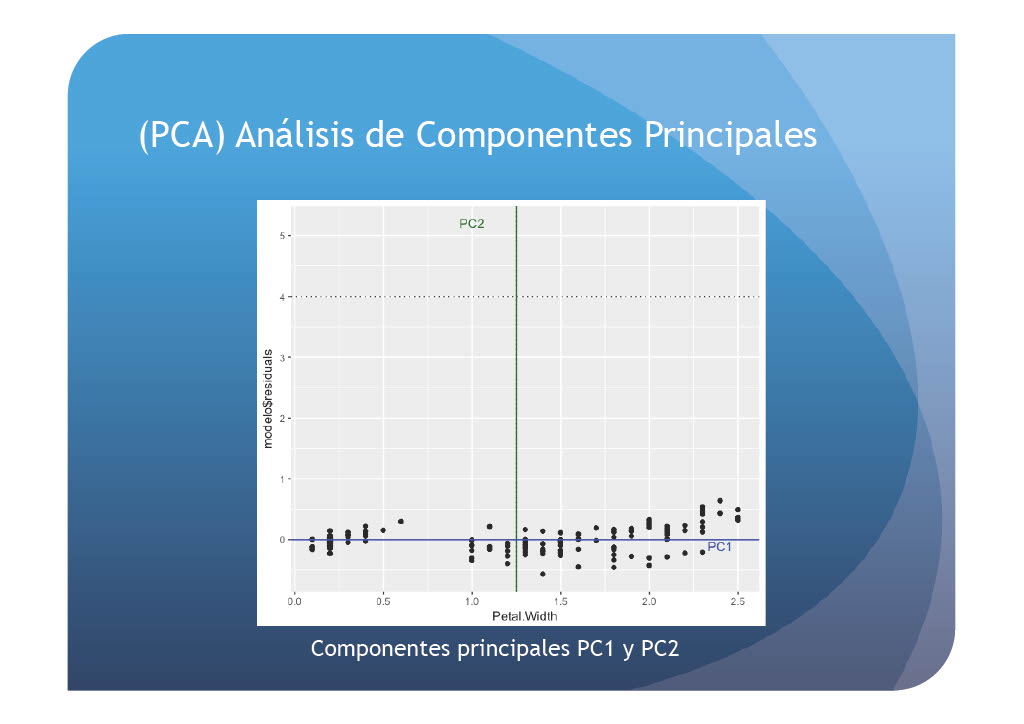

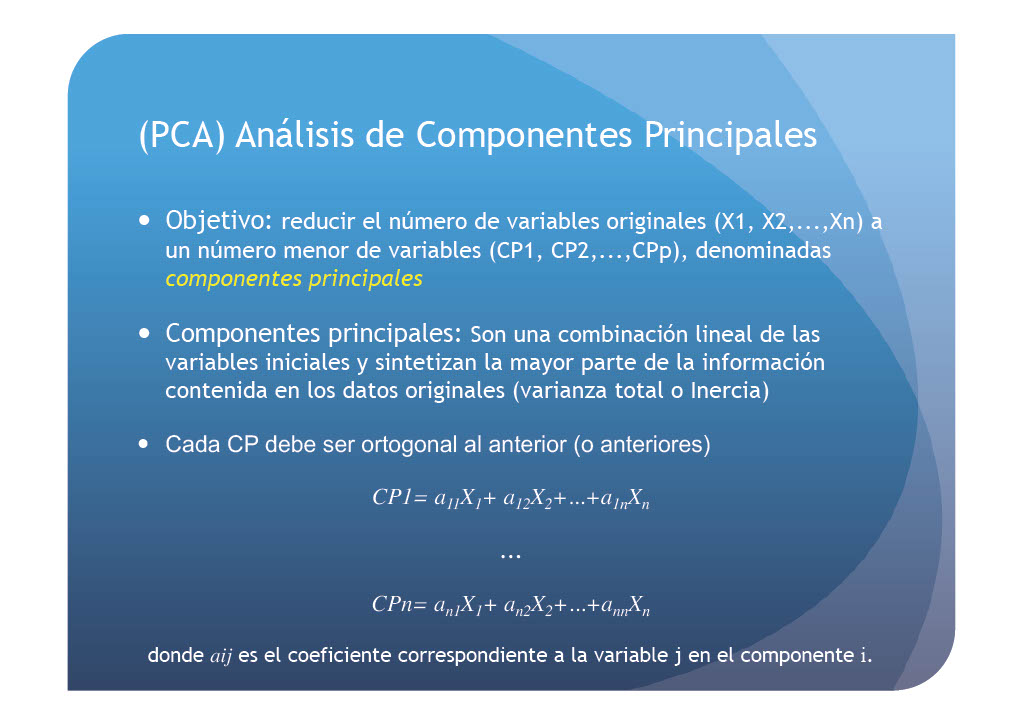

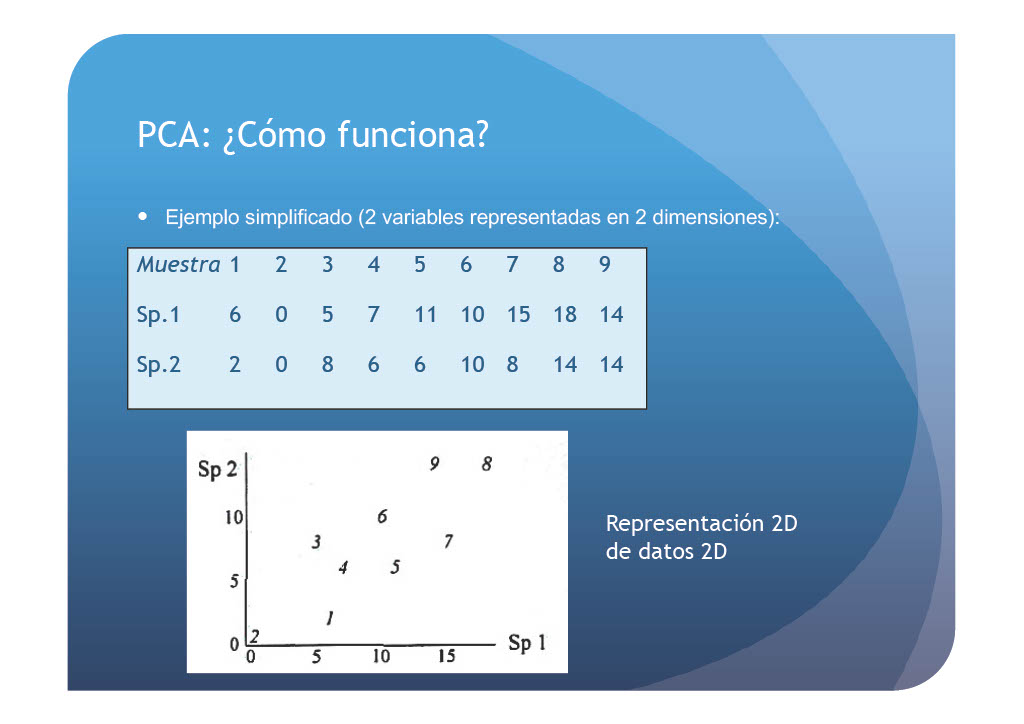

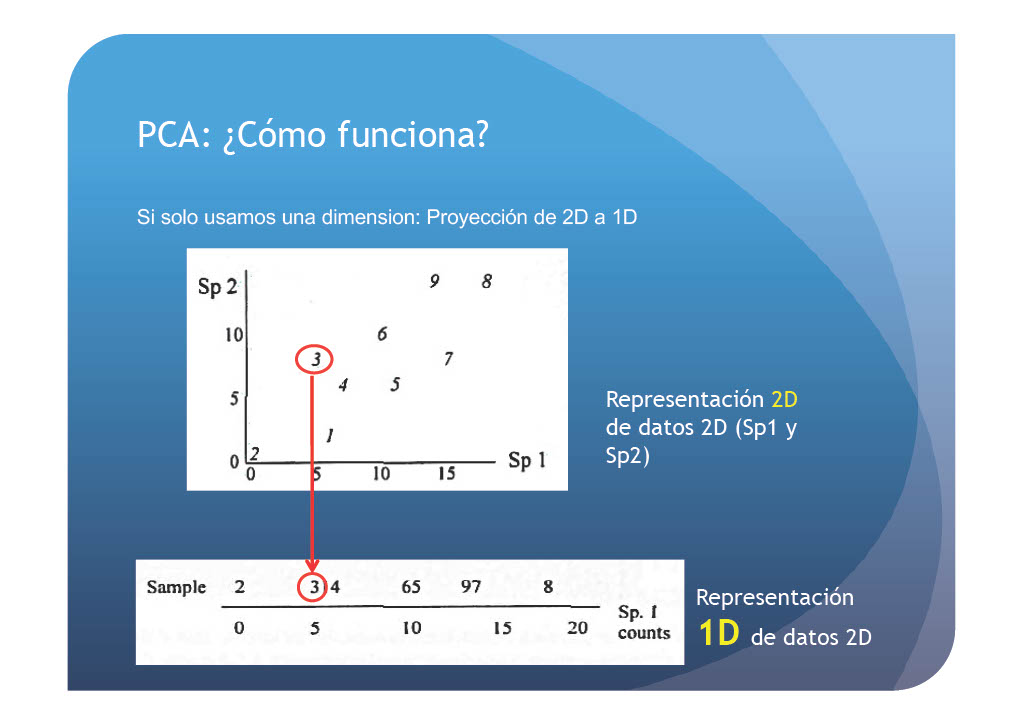

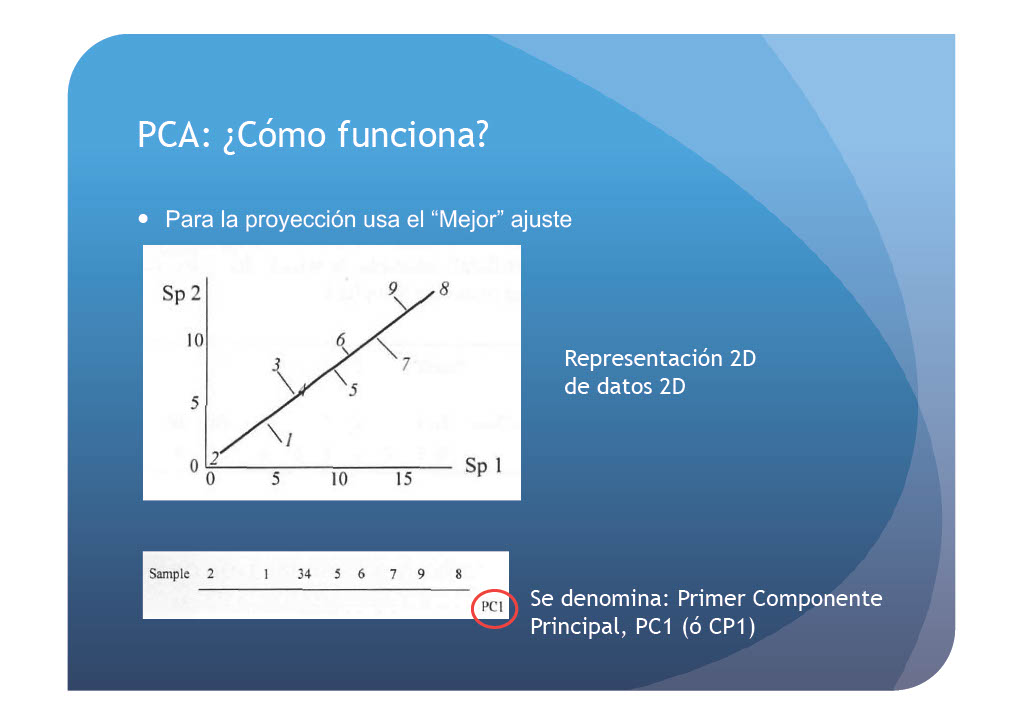

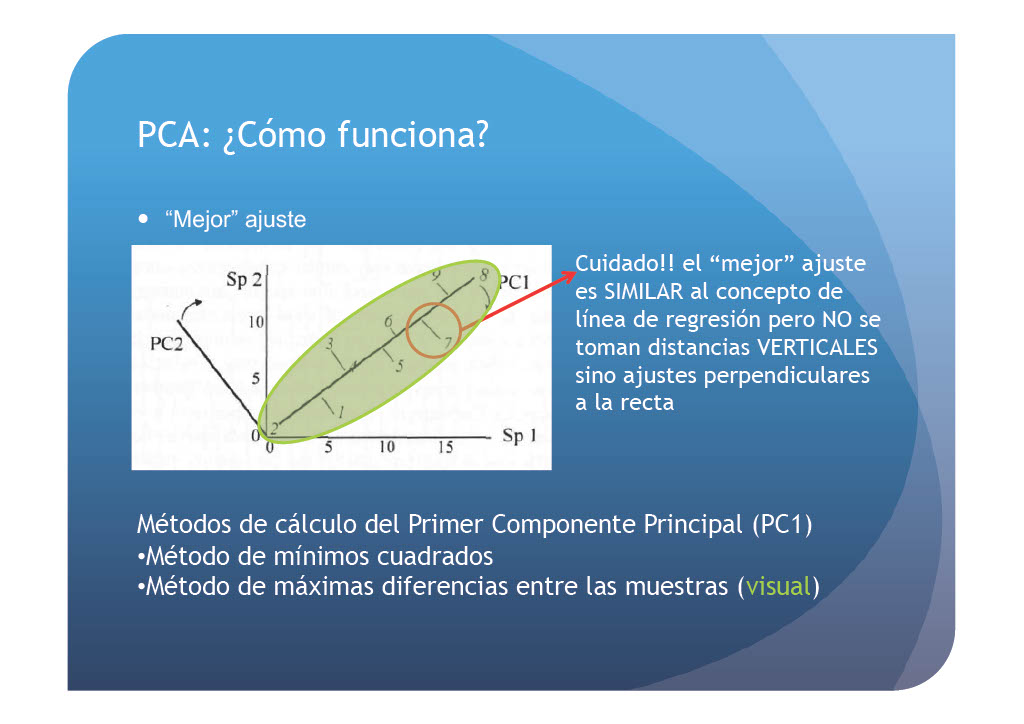

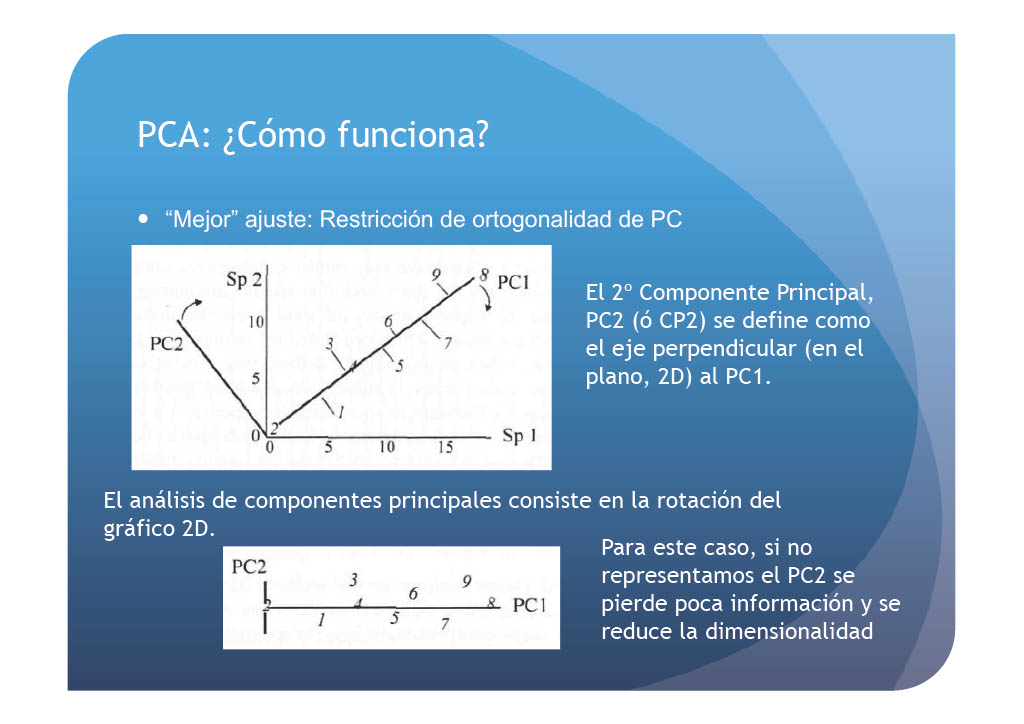

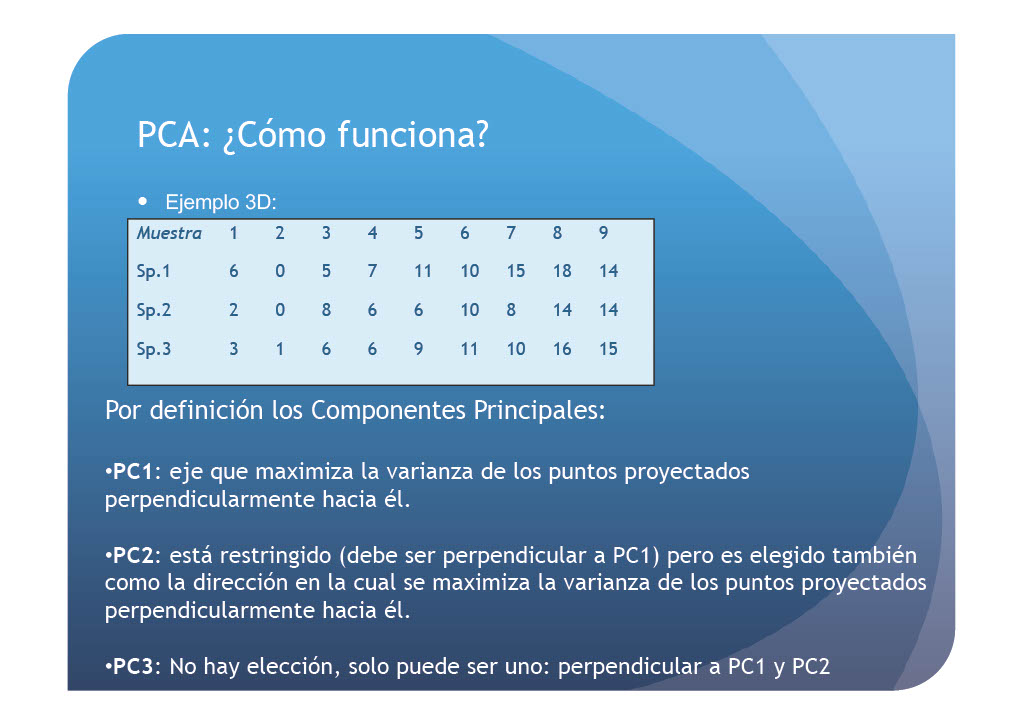

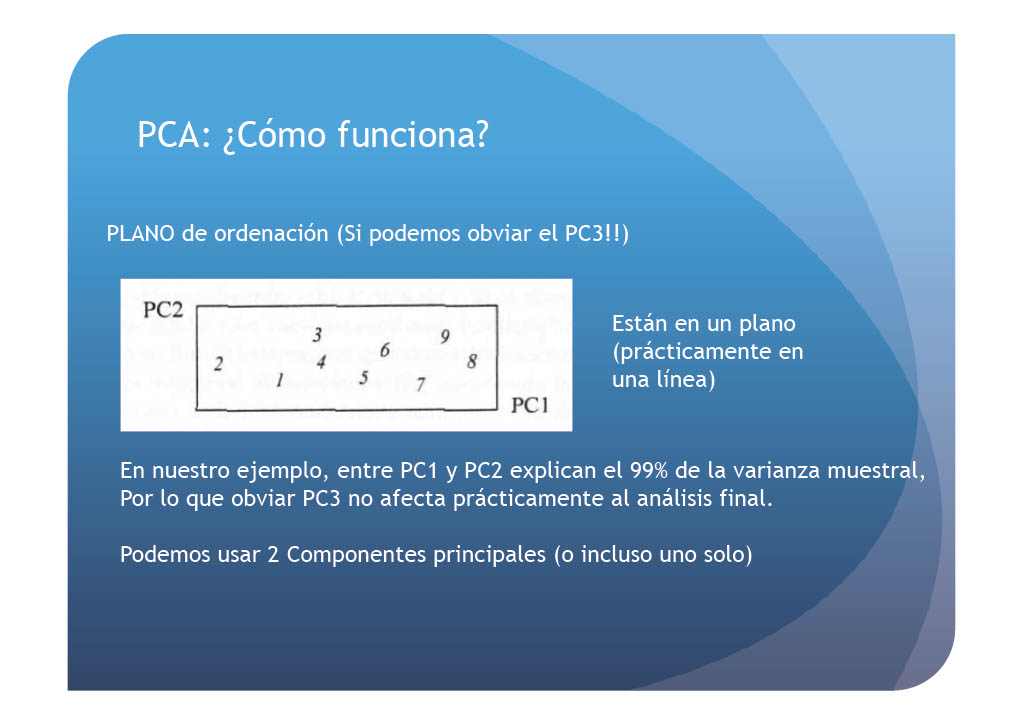

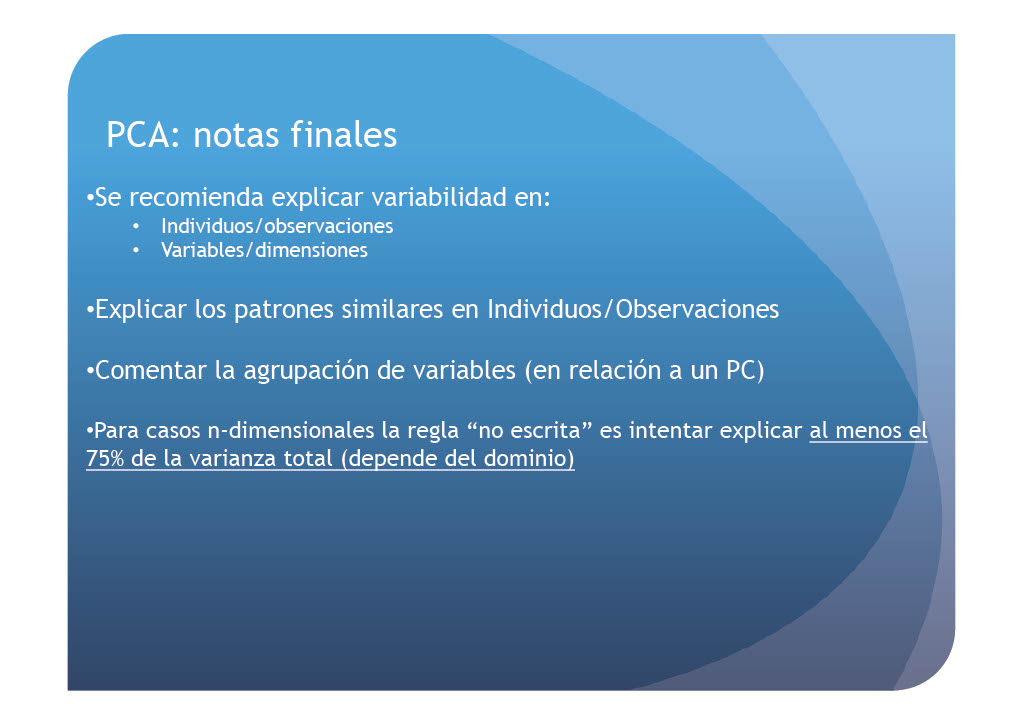

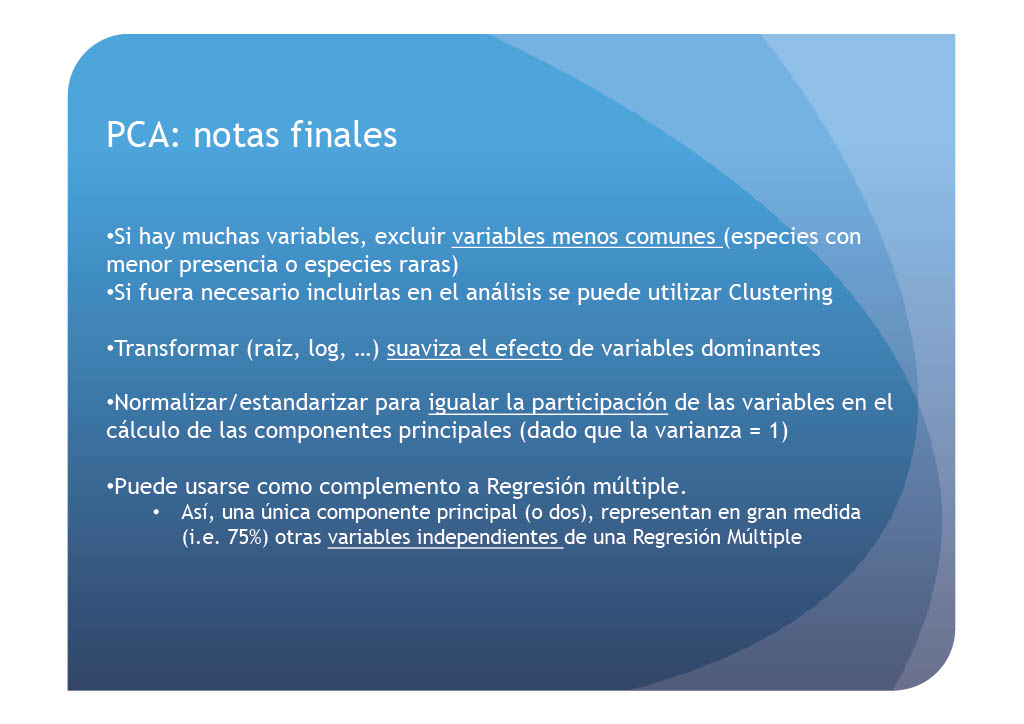

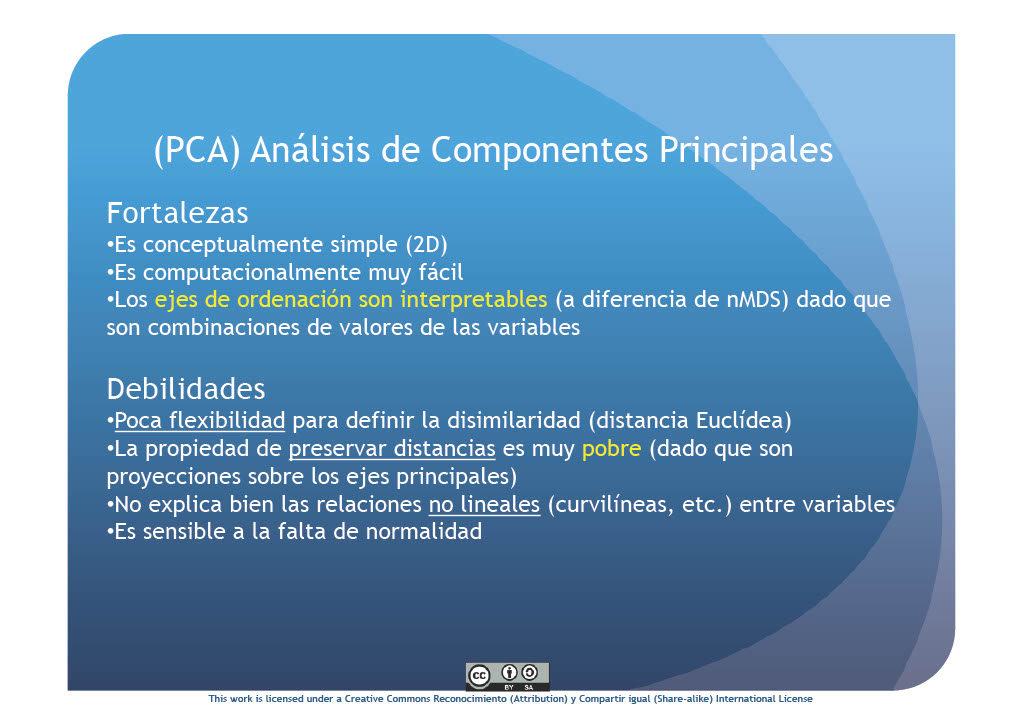